<a href="https://colab.research.google.com/github/katheforero3/CursoPython/blob/main/Examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

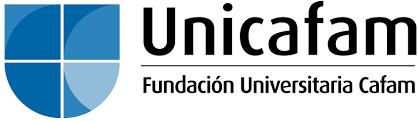

**Examen Final**

Curso Python

Unicafam

Estudiantes: Katherine Forero

Docente: Nicolas Mojica

---

El departamento de policía esta bastante preocupado por el aumento de la criminalidad en los diferentes estados de la unión americana, y aunque tienen toda la intención de poder cubrir todos los eventos el problema radica en que hay una cantidad limitada de recursos y cada uno con
diferentes habilidades entonces no sabe cómo centrar los esfuerzos para poder combatir la
criminalidad.

Actualmente se tienen 50 estados y se disponen de 3 tipos de recursos, los policías capacitados
para atender asaltos y asesinatos, que son alrededor de 300, por otra parte los policías de a pie que atienden raponazos y delincuencia común, que son alrededor de 500 y por ultimo tenemos a los cadetes, que son alrededor de 150. Estos solo pueden atender casos de baja complejidad.

De acuerdo con las ocurrencias presentadas en el set de datos dado genere propuestas de
asignación de los recursos a cada uno de los estados dependiendo de las clasificaciones del nivel de complejidad que tienen y así poder darle a la policía una sugerencia clara de cómo puede aprovechar mejor los recursos.


1. ¿Como podemos agrupar los estados?
2. ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención
al crimen?
3. ¿Cómo distribuiría los recursos?
4. ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?
5. Recomendaciones finales

In [31]:
#Instalar librerias
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
#Importando el dataset
file_path = '/content/sample_data/crime_data.csv'
crime_data = pd.read_csv(file_path)

In [36]:
data_for_clustering = crime_data.iloc[:, 1:]
normalized_data = (data_for_clustering - data_for_clustering.min()) / (data_for_clustering.max() - data_for_clustering.min())

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
crime_data['Cluster'] = kmeans.fit_predict(normalized_data)

In [39]:
print("1. ¿Como podemos agrupar los estados?:")
print(crime_data[['Unnamed: 0', 'Cluster']])

1. ¿Como podemos agrupar los estados?:
        Unnamed: 0  Cluster
0          Alabama        1
1           Alaska        1
2          Arizona        1
3         Arkansas        2
4       California        1
5         Colorado        1
6      Connecticut        2
7         Delaware        2
8          Florida        1
9          Georgia        1
10          Hawaii        2
11           Idaho        0
12        Illinois        1
13         Indiana        2
14            Iowa        0
15          Kansas        2
16        Kentucky        0
17       Louisiana        1
18           Maine        0
19        Maryland        1
20   Massachusetts        2
21        Michigan        1
22       Minnesota        0
23     Mississippi        1
24        Missouri        1
25         Montana        0
26        Nebraska        2
27          Nevada        1
28   New Hampshire        0
29      New Jersey        2
30      New Mexico        1
31        New York        1
32  North Carolina        1
33    Nor

In [40]:
high_complexity_states = crime_data[crime_data['Cluster'] == 1]['Unnamed: 0']
print("\n2. ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención al crimen?:")
print(high_complexity_states.tolist())


2. ¿Cuáles son los estados con necesidad de profesionales con mayor capacidad de atención al crimen?:
['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


In [ ]:
resources = {'Capacitados': 300, 'De a pie': 500, 'Cadetes': 150}
cluster_distribution = crime_data['Cluster'].value_counts()

In [41]:
resource_distribution = {
    cluster: {
        'Capacitados': int(resources['Capacitados'] * (count / len(crime_data))),
        'De a pie': int(resources['De a pie'] * (count / len(crime_data))),
        'Cadetes': int(resources['Cadetes'] * (count / len(crime_data))),
    }
    for cluster, count in cluster_distribution.items()
}
print("\n3. ¿Cómo distribuiría los recursos?")
for cluster, dist in resource_distribution.items():
    print(f"Cluster {cluster}: {dist}")


3. ¿Cómo distribuiría los recursos?
Cluster 1: {'Capacitados': 120, 'De a pie': 200, 'Cadetes': 60}
Cluster 2: {'Capacitados': 108, 'De a pie': 180, 'Cadetes': 54}
Cluster 0: {'Capacitados': 72, 'De a pie': 120, 'Cadetes': 36}


In [43]:
print("\n4. ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?: ")
for cluster in sorted(crime_data['Cluster'].unique()):
    cluster_states = crime_data[crime_data['Cluster'] == cluster]['Unnamed: 0'].tolist()
    print(f"Cluster {cluster}: {cluster_states}")


4. ¿Cuáles son los grupos que existen dentro del comportamiento de la criminalidad?: 
Cluster 0: ['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']
Cluster 1: ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']
Cluster 2: ['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'Nebraska', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']


In [44]:
print("\n5. Recomendaciones: ")
print("- Priorizar el envío de policías capacitados a los estados del Cluster 1 (alta complejidad).")
print("- Combinar policías de a pie y cadetes en el Cluster 2 (moderada complejidad).")
print("- Utilizar principalmente cadetes para el Cluster 0 (baja complejidad).")
print("- Monitorear constantemente los clusters y ajustar los recursos según cambien los patrones.")


5. Recomendaciones: 
- Priorizar el envío de policías capacitados a los estados del Cluster 1 (alta complejidad).
- Combinar policías de a pie y cadetes en el Cluster 2 (moderada complejidad).
- Utilizar principalmente cadetes para el Cluster 0 (baja complejidad).
- Monitorear constantemente los clusters y ajustar los recursos según cambien los patrones.
